In [ ]:
!pip install googletrans==4.0.0-rc1

In [ ]:
import pandas as pd
import numpy as np
from googletrans import Translator
import seaborn as sns
from google.colab import files
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import PorterStemmer
from itertools import repeat
import networkx as nx
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/ivangermanov/f17d897a39758b0cd2bfb7c88fc5113e/raw/f1a12cb78a683ef1697df01678334034ab8e44fe/tcc_ceds_music.csv')
df = df.sample(frac=1)
len(df)

28372

In [ ]:
df.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age
12337,38953,jelly roll,hate goes on,2017,country,type pull party like wassup witch rybody bitch...,187,0.000478,0.000478,0.022022,0.022391,0.000478,0.011791,0.050071,0.000478,0.706439,0.050216,0.000478,0.000478,0.000478,0.000478,0.000478,0.131329,0.730315,0.767710,0.061445,0.000000,0.641385,0.866863,obscene,0.042857
5623,16182,mims,this is why i'm hot,2007,pop,yeah cause cause cause cause mims gotta sell s...,162,0.000511,0.000511,0.000511,0.000511,0.081374,0.000511,0.000511,0.163232,0.573797,0.039598,0.120212,0.000511,0.000511,0.000511,0.000511,0.000511,0.605762,0.751429,0.278112,0.000000,0.475474,0.600588,obscene,0.185714
20744,62781,sudan archives,paid,2017,jazz,pay pay pay pay pay pay pay pay know know thin...,56,0.000923,0.000923,0.000923,0.000923,0.000923,0.000923,0.000923,0.286026,0.530201,0.000923,0.000923,0.000923,0.000923,0.000923,0.000923,0.045556,0.777970,0.724816,0.114457,0.195344,0.580585,0.551538,obscene,0.042857
13790,44147,allen toussaint,back in baby's arms,1975,blues,grow sickness heart defective lack control cur...,54,0.001120,0.604438,0.001120,0.067528,0.001120,0.001120,0.001120,0.001120,0.001120,0.001120,0.001120,0.001120,0.001120,0.001120,0.284418,0.026819,0.696740,0.650668,0.517068,0.000175,0.552762,0.383364,violence,0.642857
10509,30960,the band,remedy,1993,country,cold doorway hardly breathe know wanna afraid ...,77,0.001120,0.357912,0.001120,0.001120,0.001120,0.001120,0.084306,0.204867,0.001120,0.035488,0.187393,0.001120,0.001120,0.001120,0.001120,0.001120,0.729232,0.732456,0.232931,0.003583,0.968054,0.839835,violence,0.385714


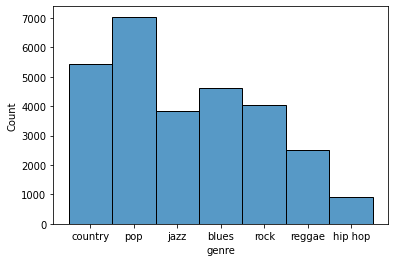

In [ ]:
sns.histplot(data=df["genre"])

In [ ]:
translator = Translator()
lyrics = df['lyrics']
langs = []

for i, lyric in enumerate(lyrics):
  try:
    print(i)
    lang_result = translator.detect(lyric)
    langs.append(lang_result.lang)
  except:
    langs.append("unknown")

langs

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

['en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'it',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'ko',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'zh-CN',
 'en',
 'en',
 'en',
 'en',
 'en',
 'es',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'en',
 'e

In [ ]:
df['lang'] = langs

In [ ]:
df.to_csv(r'with_language.csv', index = False, header=True)
files.download("with_language.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# formatted = pd.read_csv("with_language.csv")
formatted = pd.read_csv("https://gist.githubusercontent.com/bobirok/cddcae5d350e7053980453450a7b0a70/raw/b6a435f279b8af0adf0cafebcefdf85041ee3097/with_language.csv")
formatted.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,lang
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0,en
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0,en
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0,en
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0,en
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0,en


In [ ]:
no_unknown=formatted[formatted['lang'] != 'unknown']

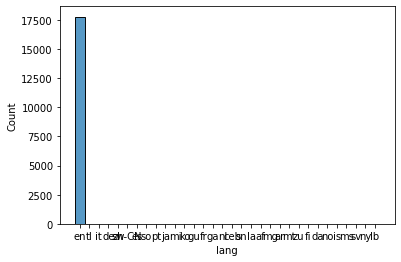

In [ ]:
sns.histplot(data=no_unknown, x="lang")

In [ ]:
only_english = no_unknown[no_unknown['lang'] == "en"]

In [ ]:
only_english.to_csv(r'only_english.csv', index = False, header=True)

In [ ]:
only_english = pd.read_csv("only_english.csv")

In [ ]:
only_english.head()

,Unnamed: 0,artist_name,track_name,release_date,genre,lyrics,len,dating,violence,world/life,night/time,shake the audience,family/gospel,romantic,communication,obscene,music,movement/places,light/visual perceptions,family/spiritual,like/girls,sadness,feelings,danceability,loudness,acousticness,instrumentalness,valence,energy,topic,age,lang
0,0,mukesh,mohabbat bhi jhoothi,1950,pop,hold time feel break feel untrue convince spea...,95,0.000598,0.063746,0.000598,0.000598,0.000598,0.048857,0.017104,0.263751,0.000598,0.039288,0.000598,0.000598,0.000598,0.000598,0.380299,0.117175,0.357739,0.454119,0.997992,0.901822,0.339448,0.137110,sadness,1.0,en
1,4,frankie laine,i believe,1950,pop,believe drop rain fall grow believe darkest ni...,51,0.035537,0.096777,0.443435,0.001284,0.001284,0.027007,0.001284,0.001284,0.001284,0.118034,0.001284,0.212681,0.051124,0.001284,0.001284,0.001284,0.331745,0.647540,0.954819,0.000002,0.325021,0.263240,world/life,1.0,en
2,6,johnnie ray,cry,1950,pop,sweetheart send letter goodbye secret feel bet...,24,0.002770,0.002770,0.002770,0.002770,0.002770,0.002770,0.158564,0.250668,0.002770,0.323794,0.002770,0.002770,0.002770,0.002770,0.002770,0.225422,0.456298,0.585288,0.840361,0.000000,0.351814,0.139112,music,1.0,en
3,10,pérez prado,patricia,1950,pop,kiss lips want stroll charm mambo chacha merin...,54,0.048249,0.001548,0.001548,0.001548,0.021500,0.001548,0.411536,0.001548,0.001548,0.001548,0.129250,0.001548,0.001548,0.081132,0.225889,0.001548,0.686992,0.744404,0.083935,0.199393,0.775350,0.743736,romantic,1.0,en
4,12,giorgos papadopoulos,apopse eida oneiro,1950,pop,till darling till matter know till dream live ...,48,0.001350,0.001350,0.417772,0.001350,0.001350,0.001350,0.463430,0.001350,0.001350,0.001350,0.001350,0.001350,0.029755,0.001350,0.068800,0.001350,0.291671,0.646489,0.975904,0.000246,0.597073,0.394375,romantic,1.0,en


In [ ]:
def obtainProcessedLyrics(musicData):
    musicData['processed_lyrics'] = ""
    for i in range(len(musicData['lyrics'])):
        musicData['processed_lyrics'][i] = stemSentence(musicData['lyrics'][i])
    return musicData
  
def stemSentence(sentence):
    porter = PorterStemmer()
    token_words=word_tokenize(sentence)
    token_words
    stem_sentence=[]
    for word in np.unique(token_words):
        stem_sentence.append(porter.stem(word))
        stem_sentence.append(" ")
    return "".join(stem_sentence)

In [ ]:
processed = obtainProcessedLyrics(only_english)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
processed.to_csv(r'processed.csv', index = False, header=True)